In [1]:
import pathlib
import matplotlib.pyplot as plt


In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
device

'cuda'

In [7]:
data_link = "/kaggle/input/military-equipment/Dataset military equipment"
data_dir = pathlib.Path(data_link)
data_dir

PosixPath('/kaggle/input/military-equipment/Dataset military equipment')

In [8]:
total_images = list(data_dir.glob("*/*.jpg"))
len(total_images)

13733

In [9]:
total_labels = list(data_dir.glob("*/*.txt"))
len(total_labels)

16809

In [10]:
train_f = list(data_dir.glob("images_train/*"))
train_l = list(data_dir.glob("labels_train/*"))
print(f"Ammount of train features/lables is equal: {len(train_f) == len(train_l)}")
print(len(train_f) ,"and", len(train_l))

Ammount of train features/lables is equal: True
11768 and 11768


In [11]:
val_f = list(data_dir.glob("images_val/*"))
val_l = list(data_dir.glob("labels_val/*"))
print(f"Ammount of validation features/lables is equal: {len(val_f) == len(val_l)}")
print(len(val_f) ,"and", len(val_l))

Ammount of validation features/lables is equal: True
1680 and 1680


In [12]:
test_f = list(data_dir.glob("images_test/*"))
test_l = list(data_dir.glob("labels_test/*"))
print(f"Ammount of test features/lables is equal: {len(test_f) == len(test_l)}")
print(len(test_f) ,"and", len(test_l))

Ammount of test features/lables is equal: True
3361 and 3361


In [13]:
def output_image(itteration, dataset):
    for i in range(itteration):
        img = dataset[i]
        img = plt.imread(img)
        plt.imshow(img)
        plt.show()
        


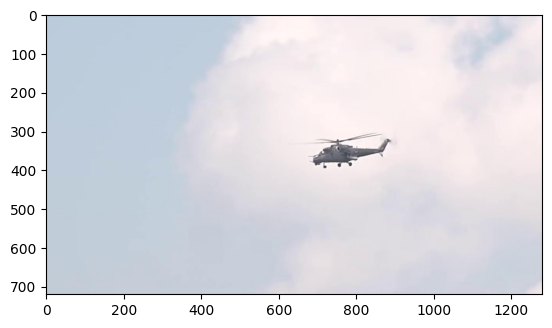

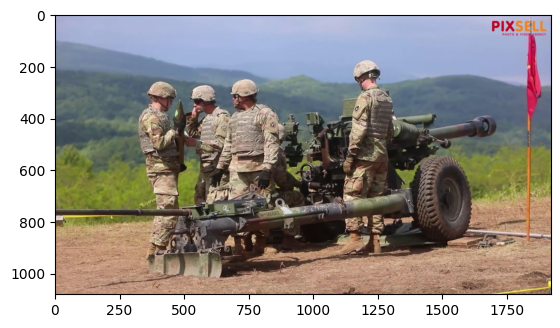

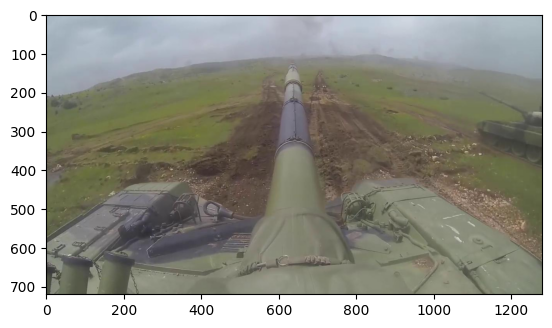

In [14]:
output_image(3, train_f)

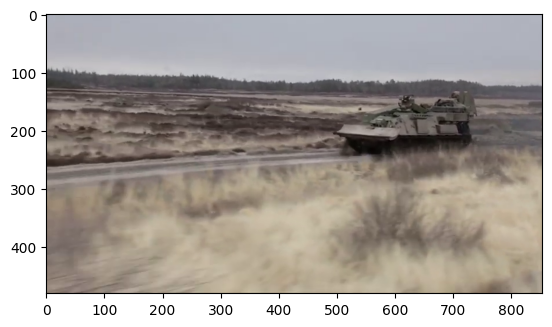

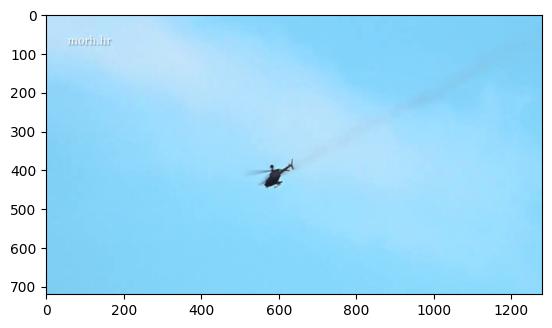

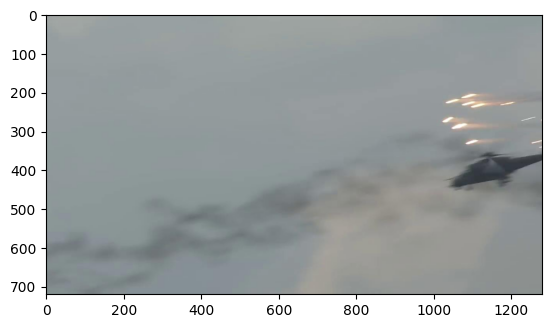

In [15]:
output_image(3, test_f)

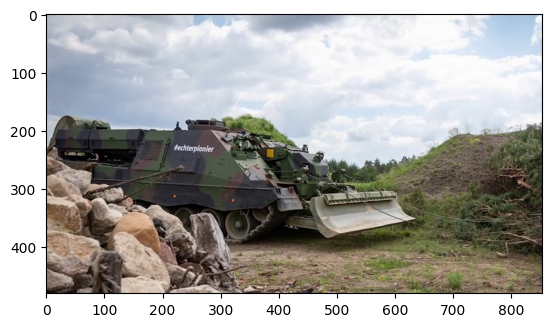

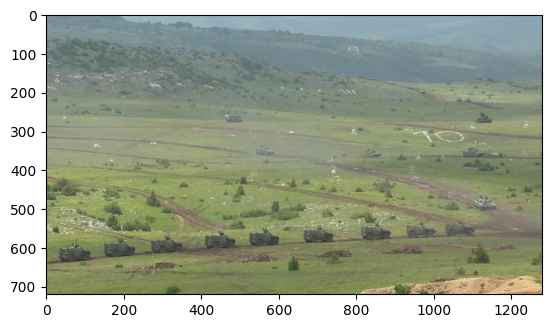

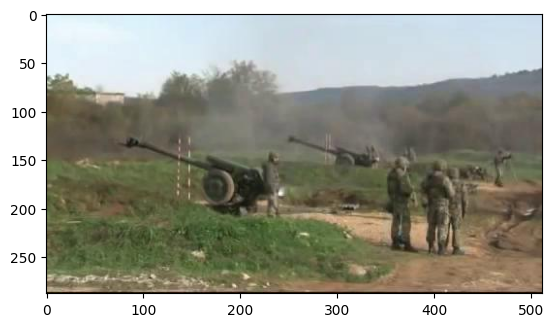

In [12]:
output_image(3, val_f)

In [16]:
import os
import shutil

base_dir = '/kaggle/working/data'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)

os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)

os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'labels'), exist_ok=True)



In [17]:
from tqdm import tqdm

def copy_files(src, dst):
    for filename in tqdm(os.listdir(src)):
        src_file = os.path.join(src, filename)
        dst_file = os.path.join(dst, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dst_file)
            
#         if len(dst) == length:
#             break


images_train_src = '/kaggle/input/military-equipment/Dataset military equipment/images_train'
labels_train_src = '/kaggle/input/military-equipment/Dataset military equipment/labels_train'

images_val_src = '/kaggle/input/military-equipment/Dataset military equipment/images_val'
labels_val_src = '/kaggle/input/military-equipment/Dataset military equipment/labels_val'


images_test_src = '/kaggle/input/military-equipment/Dataset military equipment/images_test'
labels_test_src = '/kaggle/input/military-equipment/Dataset military equipment/labels_test'



images_train_dst = os.path.join(train_dir, 'images')
labels_train_dst = os.path.join(train_dir, 'labels')

images_val_dst = os.path.join(val_dir, 'images')
labels_val_dst = os.path.join(val_dir, 'labels')

images_test_dst = os.path.join(test_dir, 'images')
labels_test_dst = os.path.join(test_dir, 'labels')

copy_files(images_train_src, images_train_dst)
copy_files(labels_train_src, labels_train_dst)

copy_files(images_val_src, images_val_dst)
copy_files(labels_val_src, labels_val_dst)

copy_files(images_test_src, images_test_dst)
copy_files(labels_test_src, labels_test_dst)


100%|██████████| 3361/3361 [00:11<00:00, 281.74it/s]


In [18]:
!pip install --upgrade torch torchvision ultralytics torchaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 986.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━

In [18]:
# from ultralytics import YOLO
# model = YOLO("/kaggle/input/pretrained-model-2/best (10).pt")
# names = model.names
# names

In [3]:
from ultralytics import YOLO
import torch

model = YOLO("yolov9c.pt")

results = model.train(data="/kaggle/input/fin-yaml-11/data-1-1-1-1.yaml", epochs=, imgsz=736, augment=True, device=device, workers=4, batch=8)


  


Ultralytics YOLOv8.2.87 🚀 Python-3.10.13 torch-2.4.0+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/kaggle/input/fin-yaml-11/data-1-1-1-1.yaml, epochs=15, time=None, patience=100, batch=8, imgsz=736, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]
2024-09-04 15:03:48,149	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-04 15:03:49,537	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train/labels... 11768 images, 0 backgrounds, 418 corrupt: 100%|██████████| 11768/11768 [00:25<00:00, 452.99it/s]

train: WARNING ⚠️ /kaggle/working/data/train/images/1328.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0246]
train: WARNING ⚠️ /kaggle/working/data/train/images/1329.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0582]
train: WARNING ⚠️ /kaggle/working/data/train/images/1330.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0586]
train: WARNING ⚠️ /kaggle/working/data/train/images/1642.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0208]
train: WARNING ⚠️ /kaggle/working/data/train/images/17720.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0193]
train: WARNING ⚠️ /kaggle/working/data/train/images/17721.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0198]
train: WARNING ⚠️ /kaggle/working/data/train/images/17722.jpg: ignoring corrupt image/label: non-n

train: New cache created: /kaggle/working/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/val/labels... 1680 images, 0 backgrounds, 53 corrupt: 100%|██████████| 1680/1680 [00:03<00:00, 455.08it/s]

val: WARNING ⚠️ /kaggle/working/data/val/images/1225.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0316]
val: WARNING ⚠️ /kaggle/working/data/val/images/17733.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0255]
val: WARNING ⚠️ /kaggle/working/data/val/images/17743.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0307]
val: WARNING ⚠️ /kaggle/working/data/val/images/17746.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0312]
val: WARNING ⚠️ /kaggle/working/data/val/images/17760.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0338]
val: WARNING ⚠️ /kaggle/working/data/val/images/17771.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0338]
val: WARNING ⚠️ /kaggle/working/data/val/images/17801.jpg: ignoring corrupt image/label: non-normalized or out of bound

val: New cache created: /kaggle/working/data/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 736 train, 736 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      8.22G       1.61      1.489      1.489         23        736: 100%|██████████| 1419/1419 [15:56<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:27<00:00,  3.76it/s]

                   all       1627       3941      0.822      0.747      0.821      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         8G      1.437      1.001      1.395         22        736: 100%|██████████| 1419/1419 [15:32<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.94it/s]

                   all       1627       3941      0.915      0.848      0.901      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      8.01G      1.333     0.8624      1.334         34        736: 100%|██████████| 1419/1419 [15:25<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.904      0.866      0.919      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.99G      1.245     0.7639       1.28         45        736: 100%|██████████| 1419/1419 [15:21<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.95it/s]

                   all       1627       3941      0.901      0.897      0.929      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      8.08G       1.15     0.6701      1.226         26        736: 100%|██████████| 1419/1419 [15:22<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.934      0.912      0.946      0.658


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.97G      1.113     0.5938      1.225         15        736: 100%|██████████| 1419/1419 [15:21<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.95it/s]

                   all       1627       3941      0.941      0.911      0.953       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      8.07G      1.055     0.5451      1.188         14        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.94it/s]

                   all       1627       3941      0.958      0.913      0.954      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      7.97G     0.9994      0.507      1.158         11        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.95it/s]

                   all       1627       3941      0.941      0.929      0.961      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      8.15G      0.939      0.471       1.12         12        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.965      0.932      0.968      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      8.09G     0.8925     0.4377      1.092          7        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.976       0.93      0.972      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      8.06G     0.8462     0.4153      1.073          6        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.966      0.943      0.973      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         8G     0.8037      0.392      1.049         18        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.97it/s]

                   all       1627       3941      0.978      0.939      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      8.08G     0.7582      0.367      1.025          8        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.977      0.941      0.979      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      7.98G     0.7171     0.3478      1.002         11        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.96it/s]

                   all       1627       3941      0.973      0.948      0.981      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      7.96G     0.6804     0.3296     0.9852         35        736: 100%|██████████| 1419/1419 [15:20<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  3.97it/s]

                   all       1627       3941       0.97      0.951      0.982      0.802



15 epochs completed in 3.973 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.13 torch-2.4.0+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 384 layers, 25,327,729 parameters, 0 gradients, 102.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:53<00:00,  1.89it/s]


                   all       1627       3941      0.965      0.944      0.979      0.793
                  TANK        288        663      0.983       0.97      0.993      0.823
                   IFV        117        229      0.961      0.978      0.992      0.852
                   APC        183        775      0.955      0.967      0.988      0.823
                    EV        245        280      0.999          1      0.995      0.896
                    AH         84        242      0.866      0.864      0.929      0.601
                    TH         83        116      0.946      0.948      0.976      0.698
                   AAP         80        115      0.961      0.887      0.968      0.697
                    TA        158        359      0.997      0.997      0.995      0.908
                    AA         56        153      0.993      0.967      0.986      0.877
                  TART        214        289      0.974      0.952      0.987      0.842
                 SPAR

lr/pg0,▃▆█▇▇▆▆▅▅▄▃▃▂▂▁
lr/pg1,▃▆█▇▇▆▆▅▅▄▃▃▂▂▁
lr/pg2,▃▆█▇▇▆▆▅▅▄▃▃▂▂▁
metrics/mAP50(B),▁▄▅▆▆▇▇▇▇██████
metrics/mAP50-95(B),▁▃▄▄▅▅▆▆▇▇▇▇███
metrics/precision(B),▁▅▅▅▆▆▇▆▇█▇███▇
metrics/recall(B),▁▅▅▆▇▇▇▇▇▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▁▁


In [5]:
# box_loss - how accurate model in box drawing
# cls_loss - how accurate model in classification
# dfl_loss - distribution-focal loss - how well model is if it concentrate on difficult cases

# box.map - how accurate in class/coordinate prediction
# box.map50 - average accuracy if threshold is more than 50 
# box.maps - average accuracy with different thresholds 

In [6]:
 from ultralytics import YOLO


model = YOLO("/kaggle/input/final-custom-model/best (16).pt") 


metrics = model.val(data='/kaggle/input/fin-yaml-11/data-1-1-1-1.yaml') 
metrics.box.map  
metrics.box.map50  
metrics.box.maps 

Ultralytics YOLOv8.2.87 🚀 Python-3.10.13 torch-2.4.0+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 384 layers, 25,327,729 parameters, 0 gradients, 102.4 GFLOPs


val: Scanning /kaggle/working/data/val/labels.cache... 1680 images, 0 backgrounds, 53 corrupt: 100%|██████████| 1680/1680 [00:00<?, ?it/s]

val: WARNING ⚠️ /kaggle/working/data/val/images/1225.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0316]
val: WARNING ⚠️ /kaggle/working/data/val/images/17733.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0255]
val: WARNING ⚠️ /kaggle/working/data/val/images/17743.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0307]
val: WARNING ⚠️ /kaggle/working/data/val/images/17746.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0312]
val: WARNING ⚠️ /kaggle/working/data/val/images/17760.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0338]
val: WARNING ⚠️ /kaggle/working/data/val/images/17771.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0338]
val: WARNING ⚠️ /kaggle/working/data/val/images/17801.jpg: ignoring corrupt image/label: non-normalized or out of bound


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:29<00:00,  3.46it/s]


                   all       1627       3941      0.977      0.963      0.988      0.833
                  TANK        288        663      0.991      0.988      0.995      0.869
                   IFV        117        229      0.971      0.978      0.993      0.885
                   APC        183        775      0.982      0.983      0.992      0.875
                    EV        245        280      0.997          1      0.995      0.924
                    AH         84        242      0.969        0.9      0.978      0.682
                    TH         83        116      0.959      0.966      0.989       0.76
                   AAP         80        115      0.973      0.945      0.974      0.714
                    TA        158        359      0.996      0.997      0.995      0.926
                    AA         56        153       0.99      0.967      0.991      0.914
                  TART        214        289      0.972      0.958      0.988      0.866
                 SPAR

array([    0.86851,     0.88512,     0.87499,      0.9245,     0.68208,     0.76021,     0.71384,     0.92641,     0.91389,     0.86632,     0.75217])

In [ ]:
# Precision example:

# We've got 100 images and a "car" class. 80 of those images contains cars and they were classified
# correctly as cars. 20 of those images dont contain cars, but were classified as ones, so 
# Precision will be: 80 / (80 + 20) = 0.8 (80% )